# Test for ABC decomposition

In [3]:
import numpy as np
import matplotlib
#from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import pylab
import sklearn.linear_model as lm

In [4]:
#### Translation operator: T => index shift 
# v-index: k and kd (0 to K-1)
# components-index : q (0 to Q-1)
# position-index : p (0 to P-1)
#
# Linear model to solve
#
# f_i = W_ij c_j
#
# position (frame) vector : f_i
# i=Kp + kd (0 to N=KP)
# component vector : c_j
# j=Kq + k (0 to M=KQ)
# weight function : W_ij = W_{p kd, k q} = delta(kd - k - Deltav_pq) for all (p,q)
# displacement of the component q for the position p : Deltav_pq

In [5]:
K=100
P=4
Q=3
N=K*P
M=K*Q

#deltav=np.zeros((P,Q))
deltav=np.array([[0,2,4],[0,1,2],[0,0,0],[0,-2,-4]])

In [6]:
def generate_abc_design_matrix(deltav,K):
    P,Q=np.shape(deltav)
    N=K*P
    M=K*Q
    Wij=np.zeros((N,M))
    print("I used 4 for loops!! Please modify my code anyone!!!")
    #naive computation
    for p in range(0,P):
        for q in range(0,Q):                
            for k  in range(0,K):
                for kd  in range(0,K):
                    i=K*p + kd
                    j=K*q + k 
                    if kd - k - deltav[p,q] == 0:
                        Wij[i,j]=1.0
    
    
    return Wij

In [7]:
Wij=generate_abc_design_matrix(deltav,K)

I used 4 for loops!! Please modify my code anyone!!!


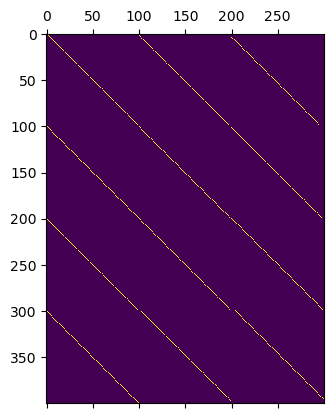

In [8]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.matshow(Wij)
plt.show()

In [9]:
#test components
def samplec(v,K,sigma,depth,vc=0.0):
    cs=np.exp(-depth*np.exp(-(v-vc)*(v-vc)/(2.0*sigma*sigma)))
    return cs
    

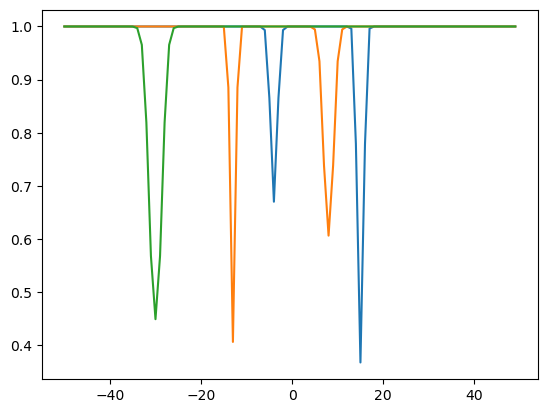

In [12]:
v=np.array(list(range(-int(K/2),int(K/2))))
c1=samplec(v,K,0.7,0.4,-4)*samplec(v,K,0.6,1,15)
c2=samplec(v,K,1,0.5,8)*samplec(v,K,0.5,0.9,-13)
c3=samplec(v,K,1.2,0.8,-30)

fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(v,c1)
ax.plot(v,c2)
ax.plot(v,c3)
plt.show()

In [13]:
# generate data set
ctrue=np.hstack([c1,c2,c3])
fi=np.dot(Wij,ctrue)/Q
fp=np.array_split(fi,P) # for display

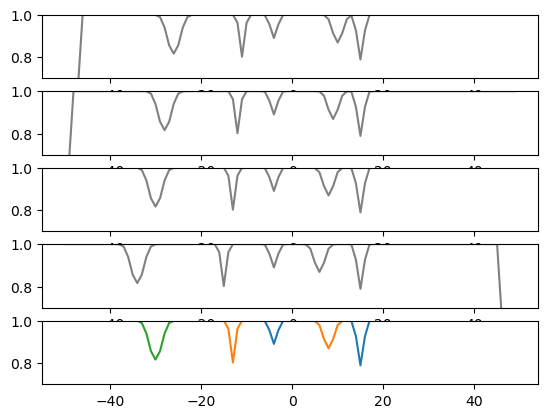

In [14]:
fig = plt.figure()
ax=fig.add_subplot(511)
ax.plot(v,fp[0],c="gray")
plt.ylim(0.7,1)
ax=fig.add_subplot(512)
ax.plot(v,fp[1],c="gray")
plt.ylim(0.7,1)
ax=fig.add_subplot(513)
ax.plot(v,fp[2],c="gray")
plt.ylim(0.7,1)
ax=fig.add_subplot(514)
ax.plot(v,fp[3],c="gray")
plt.ylim(0.7,1)
ax=fig.add_subplot(515)
ax.plot(v,(c1+2)/3)
ax.plot(v,(c2+2)/3)
ax.plot(v,(c3+2)/3)
plt.ylim(0.7,1)
plt.show()


In [12]:
# need to clean the edges of the data 

In [15]:
### masking edges

for p in range(0,P):
    mask=(v<-40.)
    fp[p][mask]=1.0
    mask=(v>40.)
    fp[p][mask]=1.0

### add noise
    
fobs=np.hstack([fp[0],fp[1],fp[2],fp[3]]) + np.random.normal(0,0.01,N)
np.shape(fobs)

(400,)

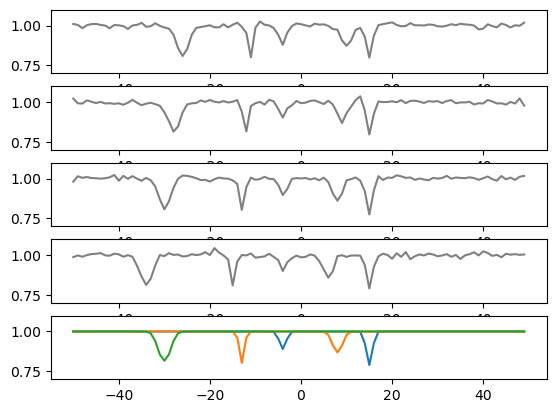

In [16]:
# clean dataset w noise

fpobs=np.array_split(fobs,P)
fig = plt.figure()
ax=fig.add_subplot(511)
ax.plot(v,fpobs[0],c="gray")
plt.ylim(0.7,1.1)
ax=fig.add_subplot(512)
ax.plot(v,fpobs[1],c="gray")
plt.ylim(0.7,1.1)
ax=fig.add_subplot(513)
ax.plot(v,fpobs[2],c="gray")
plt.ylim(0.7,1.1)
ax=fig.add_subplot(514)
ax.plot(v,fpobs[3],c="gray")
plt.ylim(0.7,1.1)
ax=fig.add_subplot(515)
ax.plot(v,(c1+2)/3)
ax.plot(v,(c2+2)/3)
ax.plot(v,(c3+2)/3)
plt.ylim(0.7,1.1)
plt.show()


In [19]:
##solve the linear_model

clf = lm.RidgeCV(alphas = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1.0,10.0])
clf.fit(Wij,fobs) 
print("Ridge lambda=",clf.alpha_)
cestr=clf.coef_
#fpre=np.dot(Wij,cest)+clf.intercept_

clf = lm.LassoCV(alphas = [0.000001,0.00001,0.0001,0.001,0.01])
clf.fit(Wij,fobs)  
print("LASSO lambda=",clf.alpha_)
cestl=clf.coef_
#fpre=np.dot(Wij,cest)+clf.intercept_

Ridge lambda= 0.1
LASSO lambda= 0.0001


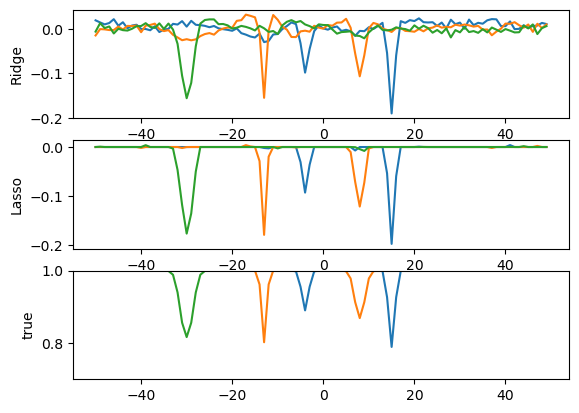

In [20]:
cestqr = np.array_split(cestr,Q)
cestql = np.array_split(cestl,Q)

fig = plt.figure()
ax=fig.add_subplot(311)
ax.plot(v,cestqr[0])
ax.plot(v,cestqr[1])
ax.plot(v,cestqr[2])
plt.ylabel("Ridge")
ax=fig.add_subplot(312)
ax.plot(v,cestql[0])
ax.plot(v,cestql[1])
ax.plot(v,cestql[2])
plt.ylabel("Lasso")
ax=fig.add_subplot(313)
ax.plot(v,(c1+2)/3)
ax.plot(v,(c2+2)/3)
ax.plot(v,(c3+2)/3)
plt.ylabel("true")
plt.ylim(0.7,1)
plt.savefig("testABC.pdf")
plt.show()